In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


In [2]:
orders = pd.read_csv("/content/orders.csv")
orders.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [3]:
users = pd.read_json("/content/users.json")
users.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [4]:
conn = sqlite3.connect(":memory:")

with open("/content/restaurants.sql", "r") as f:
    conn.executescript(f.read())

restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [5]:
final_df = orders.merge(users, on="user_id", how="left") \
                 .merge(restaurants, on="restaurant_id", how="left")

final_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [7]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


/tmp/ipython-input-3951456682.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df['order_date'] = pd.to_datetime(final_df['order_date'])


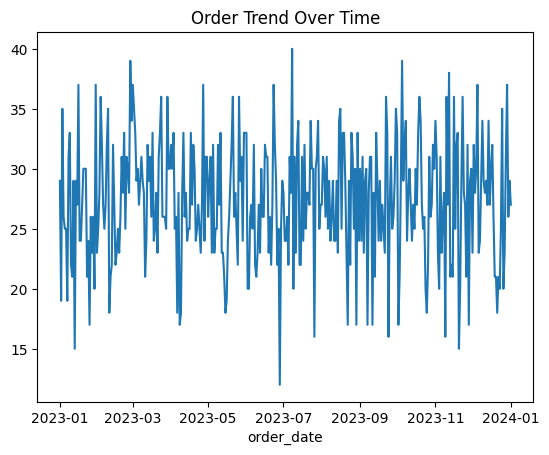

In [8]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'])

orders_by_date = final_df.groupby(final_df['order_date'].dt.date).size()

orders_by_date.plot(title="Order Trend Over Time")
plt.show()


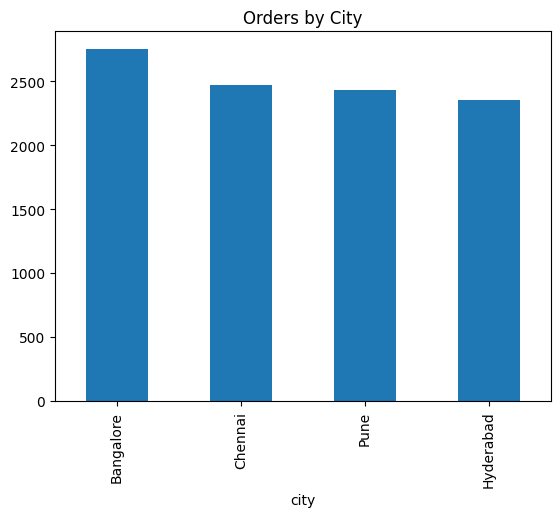

In [9]:
city_orders = final_df.groupby('city').size().sort_values(ascending=False)

city_orders.plot(kind='bar', title='Orders by City')
plt.show()


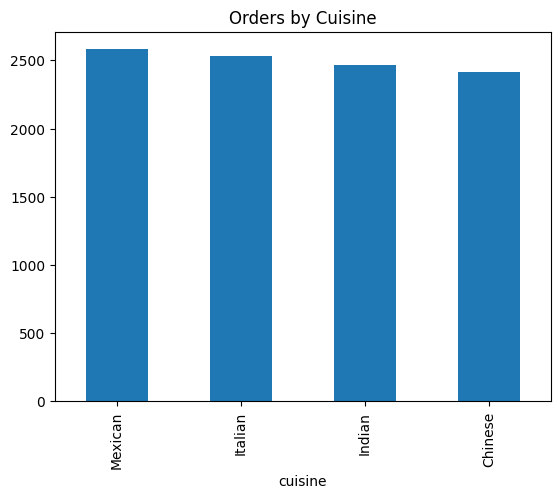

In [10]:
cuisine_orders = final_df.groupby('cuisine').size().sort_values(ascending=False)

cuisine_orders.plot(kind='bar', title='Orders by Cuisine')
plt.show()


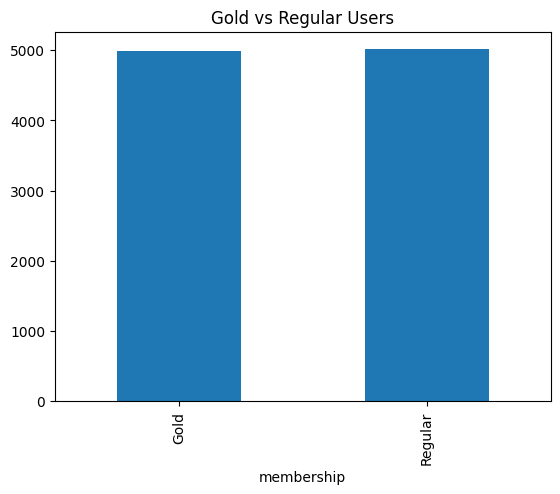

In [12]:
membership_orders = final_df.groupby('membership').size()

membership_orders.plot(kind='bar', title='Gold vs Regular Users')
plt.show()

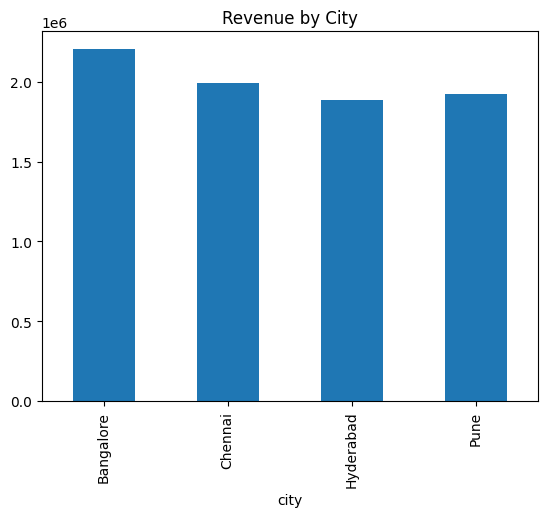

In [14]:
revenue_by_city = final_df.groupby('city')['total_amount'].sum()

revenue_by_city.plot(kind='bar', title='Revenue by City')
plt.show()